In [98]:
import sys
import os

sys.path.insert(0, '/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction')

from tools import *
from config import *

In [99]:
test_loader = read_object('test_loader_departement-01-ain_full_0_10_10_risk-watershed_weight_one_z-score_Catboost_False.pkl', Path('firemen/firepoint/2x2/test/occurence_test_geometry/departement-01-ain/full_0_10_10_risk-watershed_weight_one'))
df_test = read_object(f'test_dataset_departement-01-ain.pkl', Path('firemen/firepoint/2x2/test/occurence_test_geometry/departement-01-ain/full_0_10_10_risk-watershed_weight_one'))

In [100]:
val_loader = read_object('val_loader_full_0_10_10_risk-watershed_weight_one_z-score_Catboost_True.pkl', Path('firemen/firepoint/2x2/train/occurence_test_geometry'))
df_train = read_object(f'df_train_full_0_10_risk-watershed.pkl', Path('firemen/firepoint/2x2/train/occurence_test_geometry'))

<Axes: >

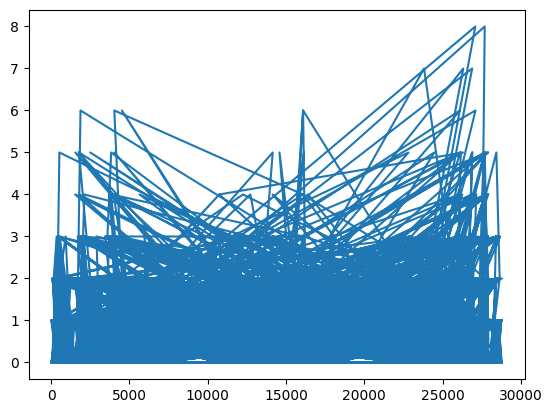

In [101]:
df_train['nbsinister'].plot()

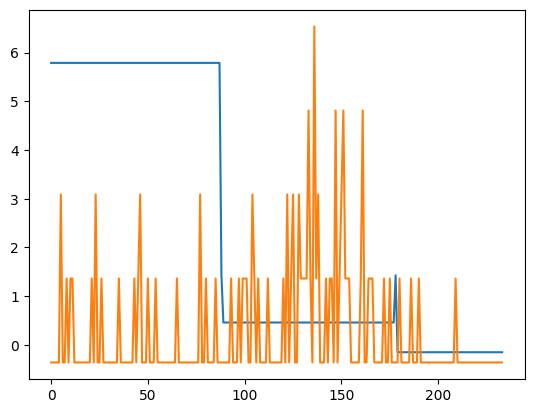

In [102]:
for data in val_loader:
    x, y, edges = data
    plt.plot(y[y[:, 0] == 0, -2])
    plt.plot(y[y[:, 0] == 0, -1])
    break

In [90]:
y.shape

torch.Size([4646, 17])

<Axes: >

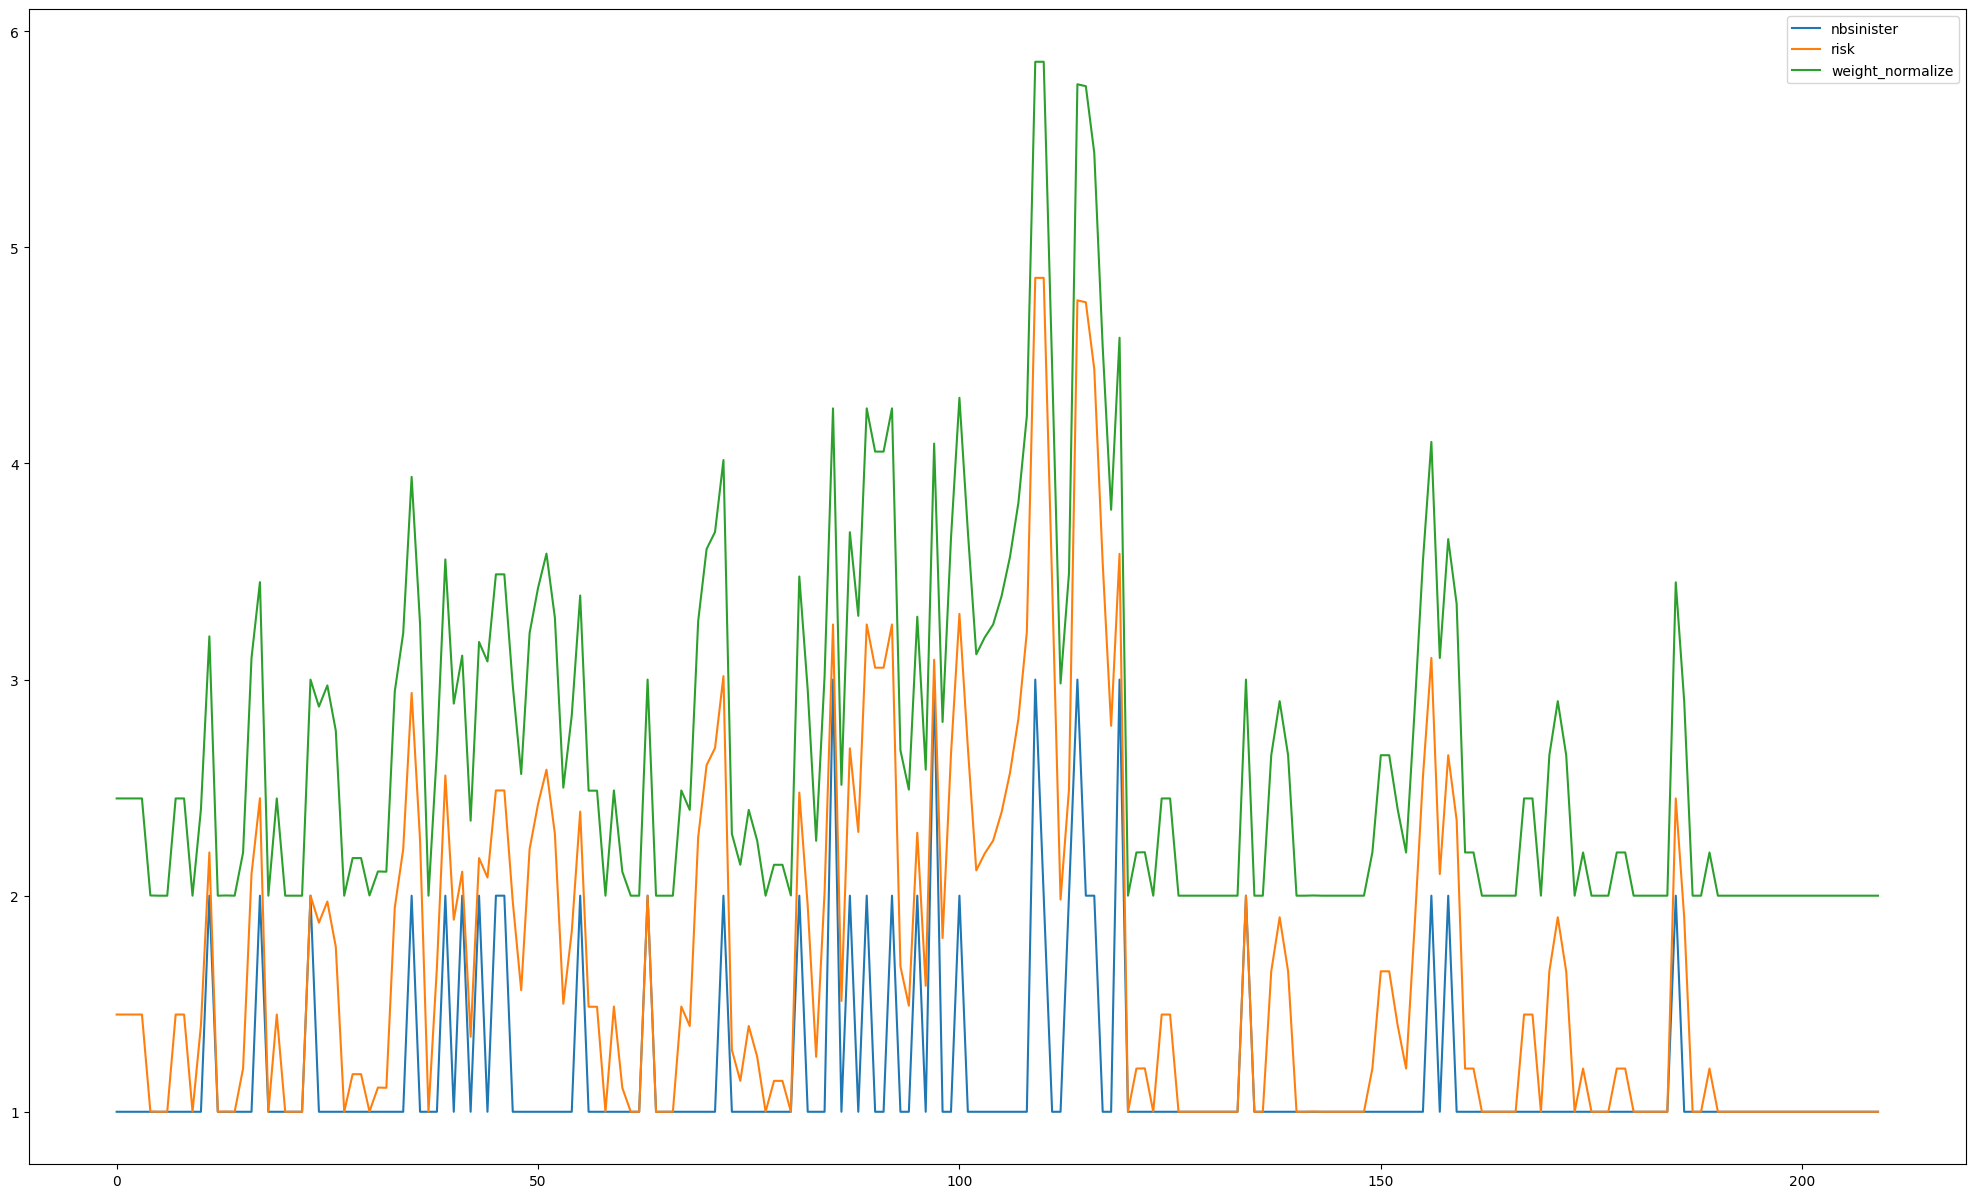

In [77]:
fig, ax = plt.subplots(1, figsize=(25,15))
df_test[df_test['nbsinister']  > 0][['nbsinister', 'risk', 'weight_normalize']].reset_index(drop=True).plot(ax=ax)

In [61]:
sample  = df_test[(df_test['id'] == 1) & (df_test['date'] == 2088)]
sample

,12_max,12_mean,12_min,AutoRegressionBin-B-1,Châtaignier_max,Châtaignier_mean,Châtaignier_min,Chênes décidus_max,Chênes décidus_mean,Chênes décidus_min,...,weight_proportion_on_zero_sinister,weight_proportion_on_zero_sinister_nbsinister,weight_random,weight_random_nbsinister,wspd16_max,wspd16_mean,wspd16_min,wspd_max,wspd_mean,wspd_min
0,-1.104625,-0.59981,-0.513127,-0.363751,-0.241088,-0.365701,0.0,0.589041,0.07457,0.0,...,1.0,1.0,1.0,1.0,0.974859,1.639047,2.389542,-0.39884,-0.318784,0.028615


In [62]:
sample[['rhum_mean',
 'pastinfluence',
 'population_mean',
 'built_max',
 'bui_mean',
 'built_mean',
 'dmc_mean',
 'Châtaignier_max',
 'bare_mean',
 'AutoRegressionBin-B-1']]

,rhum_mean,pastinfluence,population_mean,built_max,bui_mean,built_mean,dmc_mean,Châtaignier_max,bare_mean,AutoRegressionBin-B-1
0,0.585121,-0.269563,-0.167743,0.958097,-0.947457,-0.082578,-0.846539,-0.241088,0.216929,-0.363751


In [47]:
y.shape

torch.Size([512, 10, 1])

In [50]:
for data in test_loader:
    X, y, edges = data
    if np.argwhere((y[:, 0, 0] == 5) & (y[:, 4, 0] == 2088)).shape[1] != 0:
        print(np.argwhere((y[:, 0, 0] == 5) & (y[:, 4, 0] == 2088)))
        break

tensor([[5]])


In [52]:
y[np.argwhere((y[:, 0, 0] == 5) & (y[:, 4, 0] == 2088))]

tensor([[[[5.0000e+00],
          [5.6743e+00],
          [4.5821e+01],
          [1.0000e+00],
          [2.0880e+03],
          [1.0000e+00],
          [3.9000e+01],
          [0.0000e+00],
          [0.0000e+00],
          [0.0000e+00]]]])

In [60]:
y = torch.tensor(y, dtype=int)
y[1]

tensor([[   1],
        [   5],
        [  46],
        [   1],
        [2088],
        [   1],
        [   1],
        [   0],
        [   0],
        [   1]])

In [58]:
X[1]

tensor([[ 0.5851],
        [-0.2696],
        [-0.1677],
        [ 0.9581],
        [-0.9475],
        [-0.0826],
        [-0.8465],
        [-0.2411],
        [ 0.2169],
        [-0.3638]])

In [53]:
X[np.argwhere((y[:, 0, 0] == 5) & (y[:, 4, 0] == 2088))]

tensor([[[[ 0.5929],
          [-0.5096],
          [-0.5524],
          [ 0.3203],
          [-0.9475],
          [-0.6221],
          [-0.8465],
          [-0.5523],
          [-0.3233],
          [-0.3638]]]])

In [58]:
X.shape, y.shape, edges.shape

(torch.Size([404, 10]), torch.Size([404, 17]), torch.Size([3, 1500]))

In [59]:
X[0]

tensor([-0.3546, -0.5096, -0.0049,  0.1806, -0.5403,  0.4349, -0.5589, -0.5523,
        -0.3133, -0.3638])

In [36]:
import torch

torch.tensor(y, dtype=int)[:, 4].unique()

tensor([2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099,
        2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111,
        2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123,
        2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135,
        2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147,
        2148, 2149, 2150, 2164])

In [39]:
y.shape

torch.Size([512, 10, 1])

In [23]:
torch.tensor(y[y[:, 4] == 278], dtype=int)[:, 0].unique()

tensor([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [46]:
y[270], y[268]

(tensor([ 24,   1,  48,  78, 730,   1,   2,   0,   0,   0,   0,   0,   1,   0,
           1,   1,   0]),
 tensor([ 22,   1,  48,  78, 730,   1,   3,   0,   0,   0,   1,   0,   0,   0,
           2,   0,   0]))

In [34]:
y.shape

torch.Size([371, 17])

In [43]:
np.unique(edges[0])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [47]:
edges[:, edges[0] == 268]

tensor([[268, 268, 268, 268],
        [270, 269, 268, 268],
        [  0,   0,   0,   0]])